In [5]:
%matplotlib widget

import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt

## Loading Data and Model From Disk

In [6]:
# Load the model from disk
MODEL_FILE = 'model.sav'
model = pickle.load(open(MODEL_FILE, 'rb'))

# Load dataframe from disk
college_data = pd.read_csv('data/college_data', delimiter=',')

In [7]:
def prepare_x(index):
    df = college_data.drop(columns=['Name', 'Rank'])
    x = df.loc[index]

    return x

## Creating Prediction Data

In [20]:
predictions = []
ground_truth = []
name = []

for index, college in college_data.iterrows():
    predictions.append(model.predict([prepare_x(index)])[0])
    ground_truth.append(college['Rank'])
    name.append(college['Name'])

college_df = pd.DataFrame({'name': name, 'ground_truth': ground_truth, 'prediction': predictions})

# Sorts values and saves indices to save the predicted ranks
college_df = college_df.sort_values(by=["prediction"])
college_df = college_df.reset_index()

college_df.reset_index(inplace=True)

college_df = college_df.drop(columns=['index'])
college_df.rename(columns = {'level_0':'predicted_rank'}, inplace = True)

# Returns the dataframe to being sorted by ground_truth
college_df = college_df.sort_values(by=["ground_truth"])
college_df = college_df.reset_index()
college_df = college_df.drop(columns=['index'])


## Plots

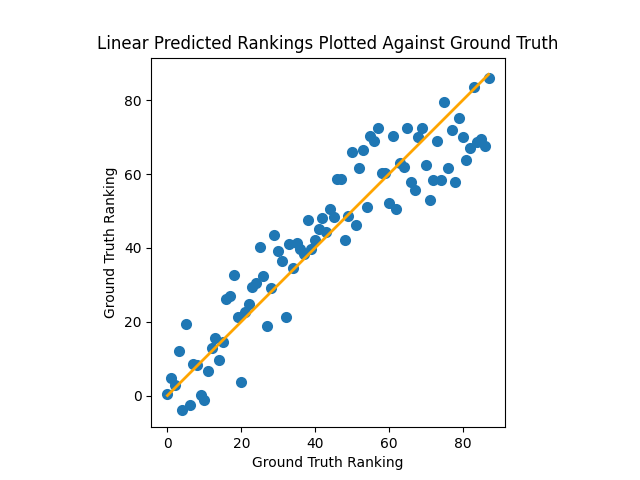

In [21]:
# Here we are plotting the raw output from the model against the ground truth

fig, ax = plt.subplots()

ax.plot(college_df.index.values, college_df['ground_truth'], linewidth=2, color='orange')
ax.scatter(college_df.index.values, college_df['prediction'], linewidth=2)
ax.set_aspect('equal', adjustable='box')

ax.set_xlabel('Ground Truth Ranking & Linear Output')
ax.set_ylabel('Ground Truth Ranking')
ax.set_title('Linear Output Plotted Against Ground Truth')
plt.show()

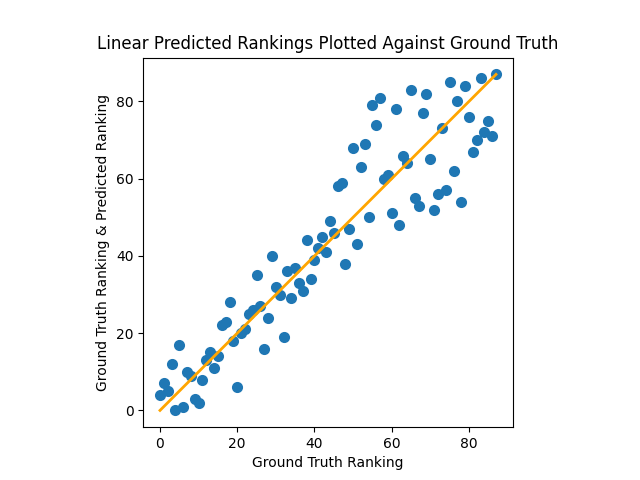

In [24]:
# Here we are plotting the predicted rank against the ground truth

fig, ax = plt.subplots()

ax.plot(college_df.index.values, college_df['ground_truth'], linewidth=2, color='orange')
ax.scatter(college_df.index.values, college_df['predicted_rank'], linewidth=2)
ax.set_aspect('equal', adjustable='box')

ax.set_xlabel('Ground Truth Ranking')
ax.set_ylabel('Ground Truth Ranking & Predicted Ranking')
ax.set_title('Predicted Rankings Plotted Against Ground Truth')
plt.show()